In [45]:
import pandas as pd

file_path = "C:/Users/gangl/Documents/Python Scripts/DS_Case_Study_(2).xlsx"

PriorAuth = pd.read_excel(file_path, sheet_name='PriorAuth')
Claims = pd.read_excel(file_path, sheet_name='Claims')

# Display the first 5 rows
PriorAuth.head()

,id,pet_name,service,submission_date,provider_id,unit,authstatus,auto_approved,clinical_reviewer,pet_id
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953
1,003031d6-cf95-4c0c-b0f2-06c89dff726f,Harper,Lab Test,2023-11-26 14:26:19,1006,3,Approved,False,NaN,PET-8260
2,003fae46-1e76-4aba-8670-95d9dabf1848,Gunther,Vaccination,2024-07-17 14:26:19,1002,4,Approved,False,NaN,PET-1854
3,004389e2-75b9-484d-ab9b-cd9b00e8af4f,Buddy,X-ray,2024-04-25 14:26:19,1003,3,Denied,False,NaN,PET-7814
4,004e13f1-d8ed-4e32-8d3d-886764f7835b,Roxy,Dental Cleaning,2023-09-25 14:26:19,1019,1,Denied,False,NaN,PET-4027


In [46]:
Claims.head()

,Pet_Name,Provider NPI,Claim ID,Claim Type,Amount Paid,Pet Id,Claim Date
0,Sophie,1008,1551DB6D,Check-up,74.64,PET-1953,2023-03-09 14:26:19
1,Sophie,1008,836C194D,Dental Cleaning,157.98,PET-1953,2023-03-27 14:26:19
2,Sophie,1008,4E38C924,X-ray,354.67,PET-1953,2022-12-23 14:26:19
3,Harper,1006,A4B45594,Check-up,117.51,PET-8260,2023-07-26 14:26:19
4,Harper,1006,16599925,Check-up,50.53,PET-8260,2022-10-01 14:26:19


In [47]:
total_per_pet = Claims.groupby("Pet Id")["Amount Paid"].transform("sum")
Claims["Total_Amount_Paid_Per_Pet"] = total_per_pet

In [48]:
count_per_pet = Claims.groupby("Pet Id")["Amount Paid"].transform("count")
Claims["Paid_Frequency_Per_Pet"] = count_per_pet
LastClaim_per_pet = Claims.groupby("Pet Id")["Claim Date"].transform("max")
Claims["LastClaim_Per_Pet"] = LastClaim_per_pet
Claims.head(10)

,Pet_Name,Provider NPI,Claim ID,Claim Type,Amount Paid,Pet Id,Claim Date,Total_Amount_Paid_Per_Pet,Paid_Frequency_Per_Pet,LastClaim_Per_Pet
0,Sophie,1008,1551DB6D,Check-up,74.64,PET-1953,2023-03-09 14:26:19,587.29,3,2023-03-27 14:26:19
1,Sophie,1008,836C194D,Dental Cleaning,157.98,PET-1953,2023-03-27 14:26:19,587.29,3,2023-03-27 14:26:19
2,Sophie,1008,4E38C924,X-ray,354.67,PET-1953,2022-12-23 14:26:19,587.29,3,2023-03-27 14:26:19
3,Harper,1006,A4B45594,Check-up,117.51,PET-8260,2023-07-26 14:26:19,1160.59,4,2023-10-08 14:26:19
4,Harper,1006,16599925,Check-up,50.53,PET-8260,2022-10-01 14:26:19,1160.59,4,2023-10-08 14:26:19
5,Harper,1006,00391F2A,X-ray,891.11,PET-8260,2021-12-01 14:26:19,1160.59,4,2023-10-08 14:26:19
6,Harper,1006,D2B0D616,Vaccination,101.44,PET-8260,2023-10-08 14:26:19,1160.59,4,2023-10-08 14:26:19
7,Gunther,1002,FCB7447A,Check-up,147.44,PET-1854,2023-01-20 14:26:19,499.26,2,2023-01-20 14:26:19
8,Gunther,1002,CA1D0D13,Lab Test,351.82,PET-1854,2022-02-17 14:26:19,499.26,2,2023-01-20 14:26:19
9,Buddy,1003,25564854,Dental Cleaning,219.98,PET-7814,2022-01-04 14:26:19,1263.77,4,2023-08-13 14:26:19


In [50]:
PriorAuth = PriorAuth.sort_values(by=["pet_id", "submission_date"])
PriorAuth["days_between_claims"] = PriorAuth.groupby("pet_id")["submission_date"].diff().dt.days

In [51]:
table_b_pairs = set(zip(Claims["Pet Id"], Claims["Claim Type"]))
PriorAuth["match_pet_service"] = PriorAuth.apply(
    lambda row: "Yes" if (row["pet_id"], row["service"]) in table_b_pairs else "No",
    axis=1
)

table_b_pairs = set(zip(Claims["Pet Id"], Claims["Provider NPI"]))
PriorAuth["match_pet_provider"] = PriorAuth.apply(
    lambda row: "Yes" if (row["pet_id"], row["provider_id"]) in table_b_pairs else "No",
    axis=1
)

table_b_pairs = set(zip(Claims["Pet Id"], Claims["Claim Type"],Claims["Provider NPI"]))
PriorAuth["match_pet_service_provider"] = PriorAuth.apply(
    lambda row: "Yes" if (row["pet_id"], row["service"], row["provider_id"]) in table_b_pairs else "No",
    axis=1
)

In [53]:
data_summary = Claims[['Pet Id', 'Total_Amount_Paid_Per_Pet', 'Paid_Frequency_Per_Pet', 'LastClaim_Per_Pet']].drop_duplicates()
PriorAuth = PriorAuth.merge(data_summary, how='left', left_on='pet_id', right_on='Pet Id')
PriorAuth.drop(columns=['Pet Id'], inplace=True)

In [54]:
mask = PriorAuth['days_between_claims'].isna() & PriorAuth['LastClaim_Per_Pet'].notna()
PriorAuth.loc[mask, 'days_between_claims'] = (PriorAuth.loc[mask, 'submission_date'] - PriorAuth.loc[mask, 'LastClaim_Per_Pet']).dt.days

In [56]:
PriorAuth.head(5)

,id,pet_name,service,submission_date,provider_id,unit,authstatus,auto_approved,clinical_reviewer,pet_id,days_between_claims,match_pet_service,match_pet_provider,match_pet_service_provider,Total_Amount_Paid_Per_Pet,Paid_Frequency_Per_Pet,LastClaim_Per_Pet
0,7385bfca-1cb8-4c9c-9308-7bcb67cfd608,Benson,Check-up,2023-08-22 14:26:19,1019,1,Approved,False,NaN,PET-1031,57.0,Yes,No,No,5788.41,5.0,2023-06-26 14:26:19
1,2da45bff-ed0e-4337-b98a-b2029b07a5a4,Benson,Check-up,2023-09-01 14:26:19,1014,1,Approved,False,NaN,PET-1031,10.0,Yes,No,No,5788.41,5.0,2023-06-26 14:26:19
2,94f828b0-87fa-4277-adff-326bf5985e99,Benson,Dental Cleaning,2023-09-06 14:26:19,1020,1,Denied,False,NaN,PET-1031,5.0,Yes,No,No,5788.41,5.0,2023-06-26 14:26:19
3,21868b05-579e-4b72-8b50-e33a15d3374c,Benson,Vaccination,2023-12-12 14:26:19,1003,4,Approved,True,NaN,PET-1031,97.0,No,No,No,5788.41,5.0,2023-06-26 14:26:19
4,1dda89cd-0e18-4ca5-9cff-78e644029fdf,Benson,Surgery,2024-01-11 14:26:19,1016,1,Denied,False,NaN,PET-1031,30.0,Yes,No,No,5788.41,5.0,2023-06-26 14:26:19


In [57]:
PriorAuth.to_csv("Ready_for_Analysis_Pets_Health.csv", index=False)

In [58]:
new_PriorAuth = PriorAuth.drop(columns=['id', 'pet_name','clinical_reviewer'])

In [59]:
new_PriorAuth.head(5)

,service,submission_date,provider_id,unit,authstatus,auto_approved,pet_id,days_between_claims,match_pet_service,match_pet_provider,match_pet_service_provider,Total_Amount_Paid_Per_Pet,Paid_Frequency_Per_Pet,LastClaim_Per_Pet
0,Check-up,2023-08-22 14:26:19,1019,1,Approved,False,PET-1031,57.0,Yes,No,No,5788.41,5.0,2023-06-26 14:26:19
1,Check-up,2023-09-01 14:26:19,1014,1,Approved,False,PET-1031,10.0,Yes,No,No,5788.41,5.0,2023-06-26 14:26:19
2,Dental Cleaning,2023-09-06 14:26:19,1020,1,Denied,False,PET-1031,5.0,Yes,No,No,5788.41,5.0,2023-06-26 14:26:19
3,Vaccination,2023-12-12 14:26:19,1003,4,Approved,True,PET-1031,97.0,No,No,No,5788.41,5.0,2023-06-26 14:26:19
4,Surgery,2024-01-11 14:26:19,1016,1,Denied,False,PET-1031,30.0,Yes,No,No,5788.41,5.0,2023-06-26 14:26:19


In [60]:
new_PriorAuth = new_PriorAuth[new_PriorAuth['authstatus'] != 'Pending']

In [64]:
confusion_matrix = pd.crosstab(new_PriorAuth['authstatus'], new_PriorAuth['auto_approved'])
print(confusion_matrix)

auto_approved  False  True 
authstatus                 
Approved        1035    361
Denied           528      0


In [65]:
new_PriorAuth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   service                     1924 non-null   object        
 1   submission_date             1924 non-null   datetime64[ns]
 2   provider_id                 1924 non-null   int64         
 3   unit                        1924 non-null   int64         
 4   authstatus                  1924 non-null   object        
 5   auto_approved               1924 non-null   bool          
 6   pet_id                      1924 non-null   object        
 7   days_between_claims         1908 non-null   float64       
 8   match_pet_service           1924 non-null   object        
 9   match_pet_provider          1924 non-null   object        
 10  match_pet_service_provider  1924 non-null   object        
 11  Total_Amount_Paid_Per_Pet   1740 non-null   float64       
 1

In [66]:
new_PriorAuth = new_PriorAuth.dropna()
new_PriorAuth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1740 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   service                     1740 non-null   object        
 1   submission_date             1740 non-null   datetime64[ns]
 2   provider_id                 1740 non-null   int64         
 3   unit                        1740 non-null   int64         
 4   authstatus                  1740 non-null   object        
 5   auto_approved               1740 non-null   bool          
 6   pet_id                      1740 non-null   object        
 7   days_between_claims         1740 non-null   float64       
 8   match_pet_service           1740 non-null   object        
 9   match_pet_provider          1740 non-null   object        
 10  match_pet_service_provider  1740 non-null   object        
 11  Total_Amount_Paid_Per_Pet   1740 non-null   float64       
 1

In [67]:
new_PriorAuth.to_csv("Ready_for_Modeling_Pets_Health.csv", index=False)

In [68]:
approval_rates = (
    new_PriorAuth.groupby('provider_id')['authstatus']
    .apply(lambda x: (x == 'Approved').mean() * 100)
    .reset_index(name='approval_rate')
)

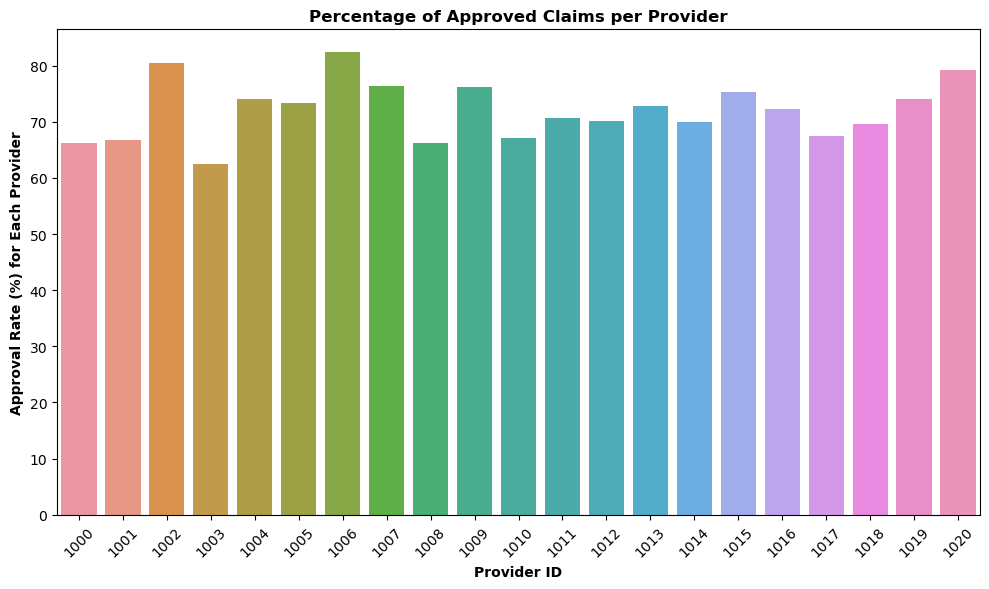

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='provider_id', y='approval_rate', data=approval_rates)
plt.ylabel('Approval Rate (%) for Each Provider',fontweight='bold')
plt.xlabel('Provider ID',fontweight='bold')
plt.title('Percentage of Approved Claims per Provider',fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('approval_rate_per_provider.png', dpi=300, bbox_inches='tight')
plt.show()

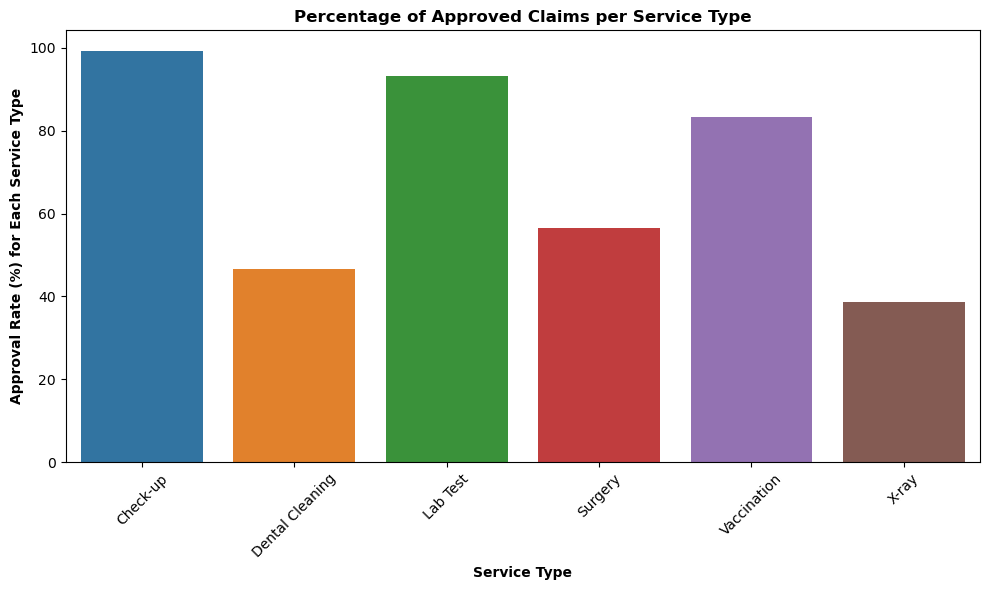

In [91]:
approval_rates_service = (
    new_PriorAuth.groupby('service')['authstatus']
    .apply(lambda x: (x == 'Approved').mean() * 100)
    .reset_index(name='approval_rate_service')
)

plt.figure(figsize=(10, 6))
sns.barplot(x='service', y='approval_rate_service', data=approval_rates_service)
plt.ylabel('Approval Rate (%) for Each Service Type',fontweight='bold')
plt.xlabel('Service Type',fontweight='bold')
plt.title('Percentage of Approved Claims per Service Type',fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('approval_rate_per_service_type.png', dpi=300, bbox_inches='tight')
plt.show()

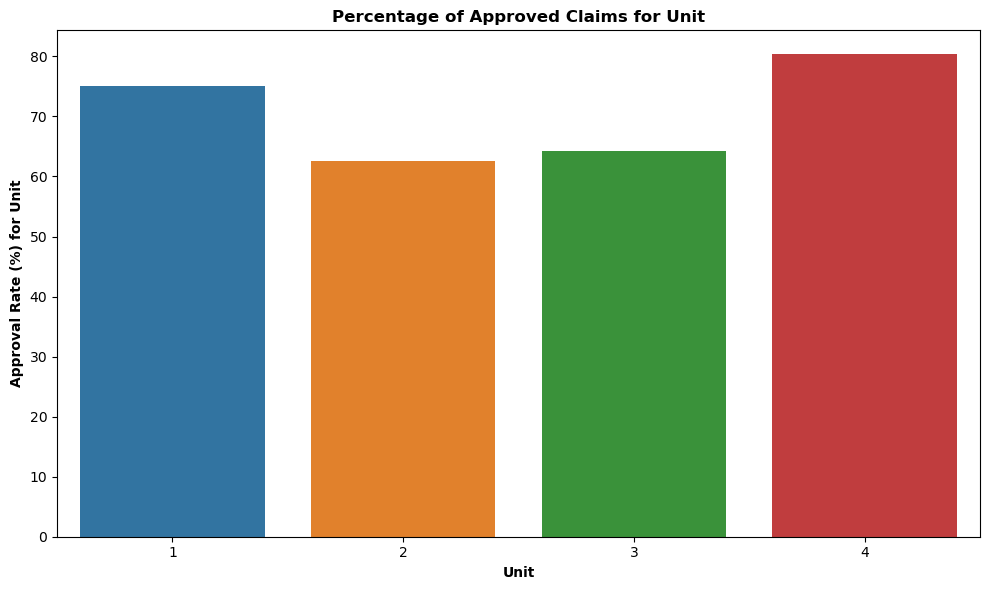

In [92]:
approval_rates_unit = (
    new_PriorAuth.groupby('unit')['authstatus']
    .apply(lambda x: (x == 'Approved').mean() * 100)
    .reset_index(name='approval_rate_unit')
)

plt.figure(figsize=(10, 6))
sns.barplot(x='unit', y='approval_rate_unit', data=approval_rates_unit)
plt.ylabel('Approval Rate (%) for Unit',fontweight='bold')
plt.xlabel('Unit',fontweight='bold')
plt.title('Percentage of Approved Claims for Unit',fontweight='bold')
plt.tight_layout()
plt.savefig('approval_rate_unit.png', dpi=300, bbox_inches='tight')
plt.show()

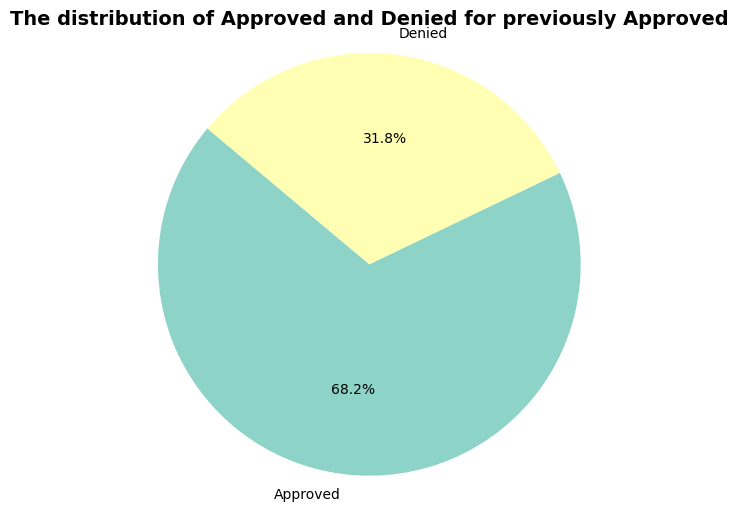

In [128]:
yes_match_df = new_PriorAuth[new_PriorAuth['match_pet_service'] == 'Yes']

authstatus_counts = yes_match_df['authstatus'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(authstatus_counts, labels=authstatus_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("The distribution of Approved and Denied for previously Approved", fontsize=14, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.savefig('Pie Chart.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\gangl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


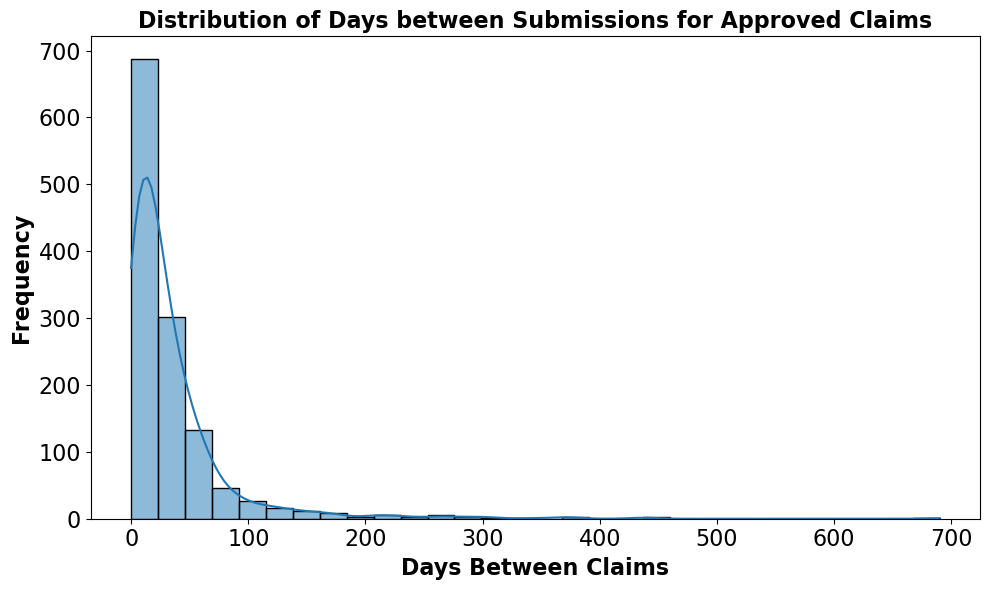

In [100]:
approved_df = new_PriorAuth[new_PriorAuth['authstatus'] == 'Approved']
# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(approved_df['days_between_claims'], kde=True, bins=30)
plt.title('Distribution of Days between Submissions for Approved Claims',fontweight='bold',fontsize=16)
plt.xlabel('Days Between Claims',fontweight='bold',fontsize=16)
plt.ylabel('Frequency',fontweight='bold',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('days_between_claims_distribution_approved.png', dpi=300)
plt.show()

C:\Users\gangl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


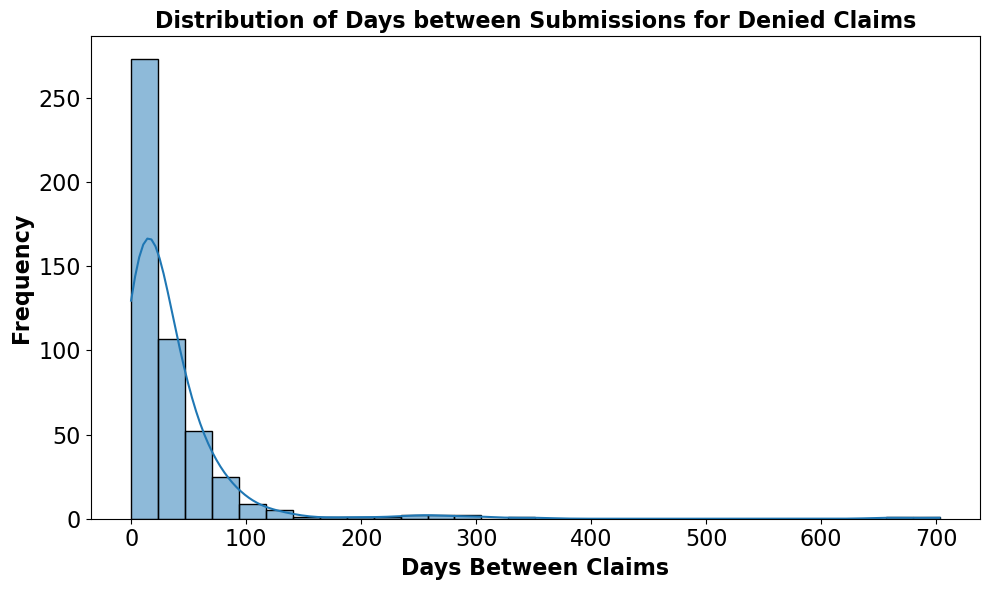

In [101]:
Denied_df = new_PriorAuth[new_PriorAuth['authstatus'] == 'Denied']
# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(Denied_df['days_between_claims'], kde=True, bins=30)
plt.title('Distribution of Days between Submissions for Denied Claims',fontweight='bold',fontsize=16)
plt.xlabel('Days Between Claims',fontweight='bold',fontsize=16)
plt.ylabel('Frequency',fontweight='bold',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('days_between_claims_distribution_Denied.png', dpi=300)
plt.show()

In [83]:
approved_df.describe()

,submission_date,provider_id,unit,days_between_claims,Total_Amount_Paid_Per_Pet,Paid_Frequency_Per_Pet,LastClaim_Per_Pet
count,1256,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256
mean,2024-02-18 10:17:31.611465216,1010.291401,1.465764,34.288217,3222.355104,5.586783,2023-05-01 20:09:07.152866560
min,2023-08-21 14:26:19,1000.000000,1.000000,0.000000,111.370000,1.000000,2021-11-13 14:26:19
25%,2023-11-21 14:26:19,1005.000000,1.000000,8.000000,970.720000,3.000000,2023-02-19 14:26:19
50%,2024-02-16 14:26:19,1010.000000,1.000000,20.000000,2322.850000,6.000000,2023-06-16 14:26:19
75%,2024-05-16 14:26:19,1016.000000,2.000000,41.250000,4952.560000,8.000000,2023-08-05 14:26:19
max,2024-08-19 14:26:19,1020.000000,4.000000,690.000000,19642.400000,10.000000,2023-11-04 14:26:19
std,NaN,6.131971,0.846143,51.090527,2938.728735,2.787356,NaN


In [84]:
Denied_df.describe()

,submission_date,provider_id,unit,days_between_claims,Total_Amount_Paid_Per_Pet,Paid_Frequency_Per_Pet,LastClaim_Per_Pet
count,484,484.000000,484.000000,484.000000,484.000000,484.000000,484
mean,2024-02-20 03:34:44.785124096,1010.105372,1.588843,34.783058,3144.762252,5.454545,2023-04-26 13:50:36.851239936
min,2023-08-20 14:26:19,1000.000000,1.000000,0.000000,111.370000,1.000000,2021-11-13 14:26:19
25%,2023-11-24 14:26:19,1005.000000,1.000000,8.000000,1005.470000,4.000000,2023-02-04 14:26:19
50%,2024-02-25 02:26:19,1010.000000,1.000000,20.000000,2297.350000,5.000000,2023-06-15 02:26:19
75%,2024-05-17 08:26:19,1016.000000,2.000000,41.000000,4871.917500,7.000000,2023-08-06 08:26:19
max,2024-08-19 14:26:19,1020.000000,4.000000,703.000000,19642.400000,10.000000,2023-10-08 14:26:19
std,NaN,6.155613,0.852690,59.653177,2731.524950,2.493055,NaN


C:\Users\gangl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


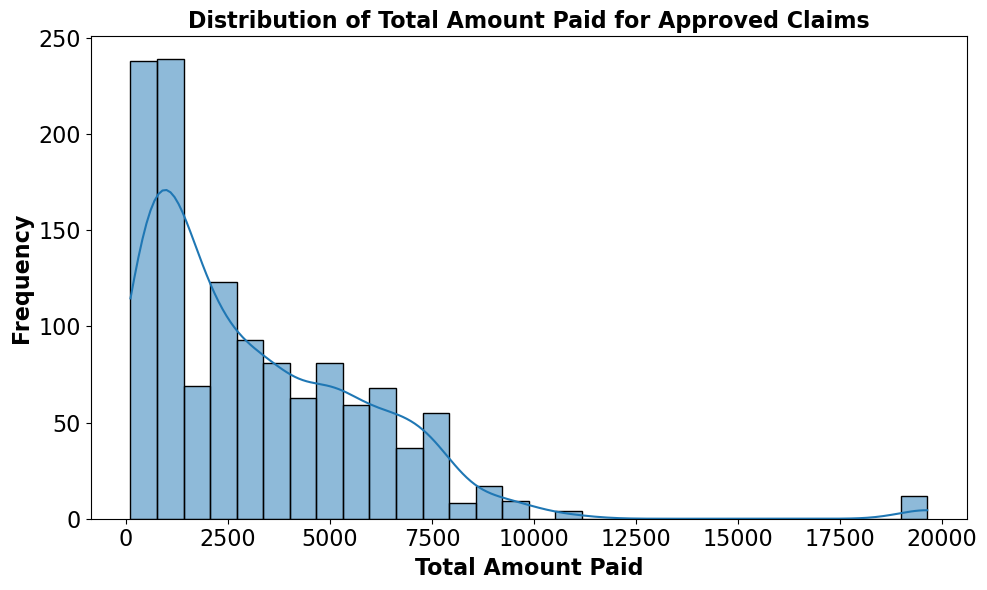

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(approved_df['Total_Amount_Paid_Per_Pet'], kde=True, bins=30)
plt.title('Distribution of Total Amount Paid for Approved Claims',fontweight='bold',fontsize=16)
plt.xlabel('Total Amount Paid',fontweight='bold',fontsize=16)
plt.ylabel('Frequency',fontweight='bold',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('Total_amount_Paid_distribution_approved.png', dpi=300)
plt.show()

C:\Users\gangl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


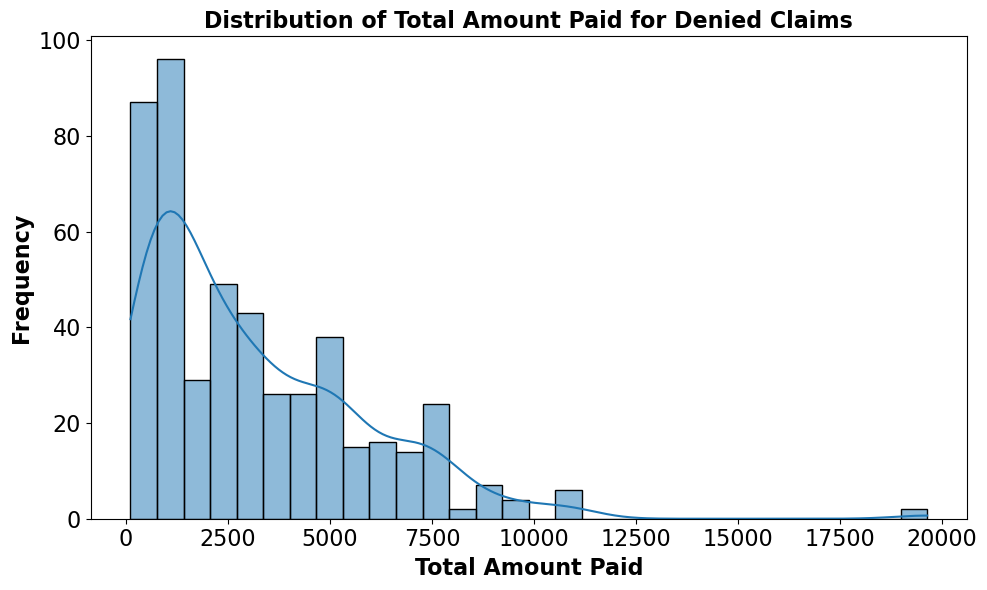

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(Denied_df['Total_Amount_Paid_Per_Pet'], kde=True, bins=30)
plt.title('Distribution of Total Amount Paid for Denied Claims',fontweight='bold',fontsize=16)
plt.xlabel('Total Amount Paid',fontweight='bold',fontsize=16)
plt.ylabel('Frequency',fontweight='bold',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('Total_amount_Paid_distribution_Denied.png', dpi=300)
plt.show()

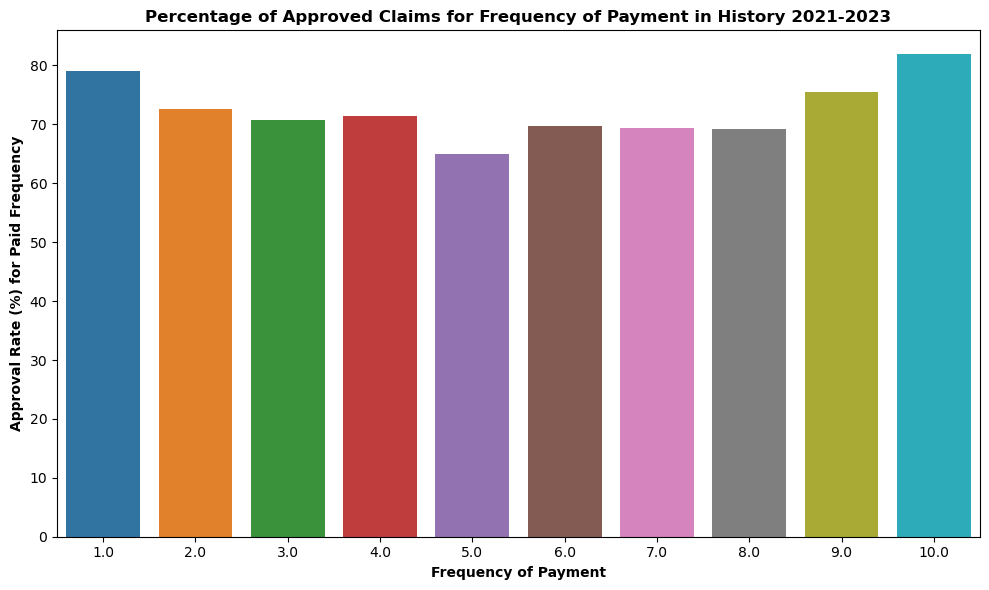

In [105]:
approval_rates_Paid_Frequency = (
    new_PriorAuth.groupby('Paid_Frequency_Per_Pet')['authstatus']
    .apply(lambda x: (x == 'Approved').mean() * 100)
    .reset_index(name='approval_rates_Paid_Frequency')
)

plt.figure(figsize=(10, 6))
sns.barplot(x='Paid_Frequency_Per_Pet', y='approval_rates_Paid_Frequency', data=approval_rates_Paid_Frequency)
plt.ylabel('Approval Rate (%) for Paid Frequency',fontweight='bold')
plt.xlabel('Frequency of Payment',fontweight='bold')
plt.title('Percentage of Approved Claims for Frequency of Payment in History 2021-2023',fontweight='bold')
plt.tight_layout()
plt.savefig('approval_rate_paid_Frequency.png', dpi=300, bbox_inches='tight')
plt.show()

In [106]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.svm import SVC, LinearSVC
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', (FutureWarning, ConvergenceWarning))
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from seaborn import heatmap
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
X = new_PriorAuth[['service', 'provider_id', 'unit', 'days_between_claims','match_pet_service', 'match_pet_provider', 'match_pet_service_provider','Total_Amount_Paid_Per_Pet', 'Paid_Frequency_Per_Pet']]
y = new_PriorAuth['authstatus']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,         
    stratify=y,            
    random_state=42        
)

In [115]:
categorical_cols = ['service', 'provider_id', 'match_pet_service',
                    'match_pet_provider', 'match_pet_service_provider']
numerical_cols = ['unit', 'days_between_claims', 'Total_Amount_Paid_Per_Pet',
                  'Paid_Frequency_Per_Pet']

In [118]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [119]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

In [120]:
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")

Cross-validation accuracy scores: [0.82795699 0.83870968 0.83093525 0.82374101 0.83093525]
Mean accuracy: 0.8305


In [121]:
from sklearn.metrics import accuracy_score

# Fit the pipeline on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

Test set accuracy: 0.8649


In [123]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[226  25]
 [ 22  75]]


In [124]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

    Approved       0.91      0.90      0.91       251
      Denied       0.75      0.77      0.76        97

    accuracy                           0.86       348
   macro avg       0.83      0.84      0.83       348
weighted avg       0.87      0.86      0.87       348



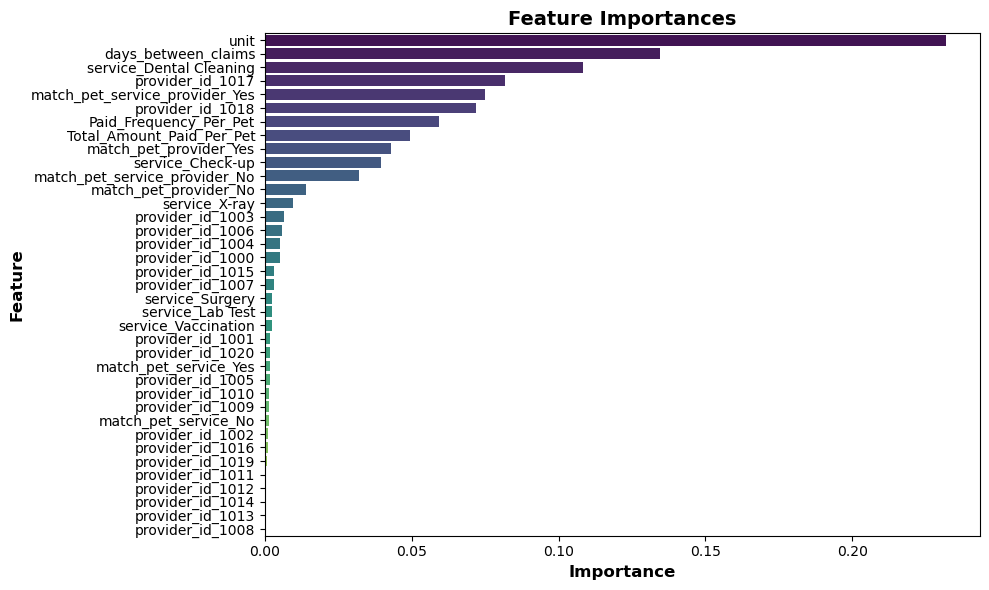

In [126]:
importances = model.named_steps['classifier'].feature_importances_

numeric_features = numerical_cols
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = list(numeric_features) + list(categorical_features)

feat_imp_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importances', fontsize=14, weight='bold')
plt.xlabel('Importance', fontsize=12, weight='bold')
plt.ylabel('Feature', fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig('Feature_Importance.png', dpi=300)
plt.show()